# Прв парцијален испит по Основи на Вештачката Интелигенција

## Задача 2 - Подвижен робот кој разнесува алат

Пред вас е 2Д слика од подот на една фабрика. Со белото квадратче е означен подвижниот робот чија задача е да разнесува алат низ фабриката. Со броеви од 1 до 6 се означени работните станици. Роботот може да се движи само во 4 насоки: напред, назад, лево и десно.

![Подот на фабриката](factory.png)

In [1]:
import numpy as np
import heapq
from matplotlib import pyplot as plt
import skimage
from skimage import io

### Преставување на околината

Околината е матрица каде со 0 е означено празно место, со 7 е означен роботот, а секоја станица е означена со нејзниот број. Во променливата `dimension_world` се запишани димензиите на околината. Површината на работните станици е запишана во речникот `area_workstation`. 

* 0 - empty
* 1 - workstation 1
* 2 - workstation 2
* 3 - workstation 3
* 4 - workstation 4
* 5 - workstation 5
* 6 - workstation 6
* 7 - agent


Во продолжение дадени ви се две функции. Првата, `reset_world()`, ја враќа околината каква што била на почетокот, исто како на горната сликата. Втората, `visualise_world()`, е функција која ќе ви ја исцрта околината, а секој број од околината `world` ќе ви го означи со различна боја.

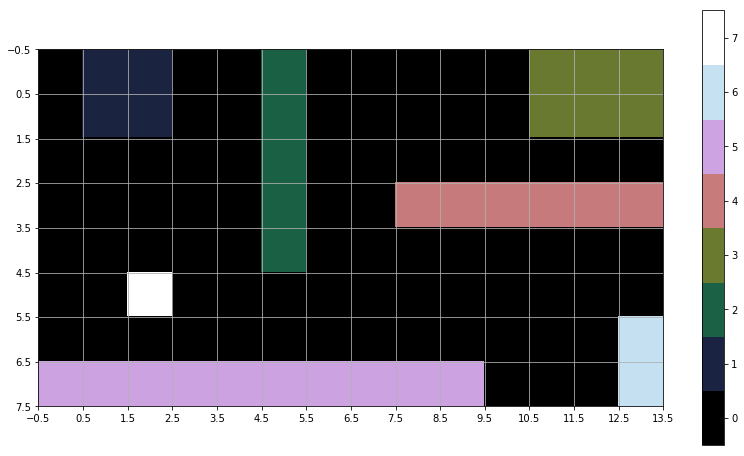

In [2]:
dimensions_world = (8, 14)

area_workstation = {}
area_workstation[1] = [(0, 1), (1, 1), (0, 2), (1, 2)]
area_workstation[2] = [(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]
area_workstation[3] = [(0, 11), (0, 12), (0, 13), (1, 11), (1, 12), (1, 13)]
area_workstation[4] = [(3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13)]
area_workstation[5] = [(7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)]
area_workstation[6] = [(6, 13), (7, 13)]

def visualise_world(world, path=[]):
    for point in path:
        world[point] = 7
    plt.rcParams['figure.figsize'] = [dimensions_world[1], dimensions_world[0]]
    plt.imshow(world, cmap=plt.cm.get_cmap('cubehelix', np.unique(world).size))
    plt.colorbar()
    plt.clim(-0.5, np.unique(world).size - 0.5)
    plt.xticks(np.arange(dimensions_world[1] + 1) - 0.5)
    plt.yticks(np.arange(dimensions_world[0] + 1) - 0.5)
    plt.grid()

def reset_world(dimensions_world, initial_agent_state):
    world = np.zeros(dimensions_world, dtype=int)
    for workstation_id, area in area_workstation.items():
        for square in area:
            world[square] = workstation_id
    world[initial_agent_state] = 7
    return world

world = reset_world(dimensions_world, initial_agent_state=(5, 2))
visualise_world(world)

Во продолжение ви е даден веќе готов А* алгоритам кој ќе ви ја најде најкратката патека од почетната позиција на роботот `initial_state` до посакуваната позиција `goal_state`. За евристика се користи евклидовото растојание. Роботот може да се движи само во 4 насоки, нагоре, надолу, лево и десно. Функцијата `a_star_search()` ќе ви го врати најкраткиот пат кој, за да го видите на слика, треба да го испратите на функцијата `visualise_path()` како аргумент `path`.

[(5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]


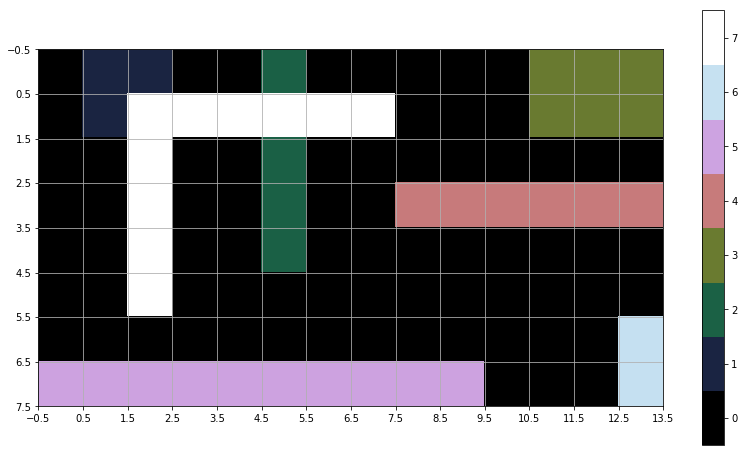

In [3]:
def distance(agent_state, another_state):
    return np.sqrt((agent_state[0] - another_state[0])**2 + (agent_state[1] - another_state[1])**2)

def expand_state(state_to_expand):
    i, j = state_to_expand
    new_states = []
    if i > 0:
        new_states.append((i - 1, j))
    if j > 0:
        new_states.append((i, j - 1))
    if i < world.shape[0] - 1:
        new_states.append((i + 1, j))
    if j < world.shape[1] - 1:
        new_states.append((i, j + 1))
    return new_states

def a_star_search(initial_state, goal_state):
    alpha = 0.5
    expanded = set()
    states_queue = [((0, 0), [initial_state])]
    heapq.heapify(states_queue)
    while states_queue:
        current_weight, states_list = heapq.heappop(states_queue)
        current_a_star_weight, current_path_weight = current_weight
        state_to_expand = states_list[-1]
        if state_to_expand == goal_state:
            return states_list
        if state_to_expand in expanded:
            continue
        for next_state in expand_state(state_to_expand):
            transition_weight = 1
            uniform_cost_weight = current_path_weight + transition_weight
            heuristic_weight = distance(next_state, goal_state)
            a_star_weight = (1 - alpha) * uniform_cost_weight + alpha * heuristic_weight
            if next_state not in expanded:
                heapq.heappush(states_queue, ((a_star_weight, uniform_cost_weight), states_list + [next_state]))
        expanded.add(state_to_expand)
    return []

initial_state = (5, 2)
world = reset_world(dimensions_world, initial_agent_state=initial_state)
goal_state = (1, 7)
path = a_star_search(initial_state, goal_state)
print(path)
visualise_world(world, path)